# Linear Regression

In [1]:
import pandas as pd
import os
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
TMDB_filename = os.path.join(os.getcwd(), "TMDB_tv_dataset_v3.csv")
df = pd.read_csv(TMDB_filename)

In [3]:
drop_columns = {'popularity', 'cleaned_overview', 'overview'}

In [4]:
# Creating our labeled examples with 'y' as our label and 'X' being our features
y = df['popularity']
X = df.drop(columns = drop_columns, axis = 1)

In [19]:
X.columns.tolist()

['number_of_seasons',
 'number_of_episodes',
 'vote_count',
 'vote_average',
 'adult',
 'episode_run_time',
 'Action & Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'History',
 'Kids',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality',
 'Romance',
 'Sci-Fi & Fantasy',
 'Soap',
 'Talk',
 'War & Politics',
 'Western',
 'original-language_en',
 'original-language_zh',
 'original-language_ja',
 'original-language_ko',
 'original-language_de',
 'original-language_fr',
 'original-language_es',
 'original-language_pt',
 'original-language_ru',
 'original-language_nl',
 'created-by_Shotaro Ishinomori',
 'created-by_John de Mol',
 'created-by_Adrián Suar',
 'created-by_Simon Fuller',
 'created-by_Ekta Kapoor',
 'created-by_Na Young-seok',
 'created-by_Yang Li-Hua',
 'created-by_Joseph Barbera, William Hanna',
 'created-by_R.J. Nuevas',
 'created-by_Mark Burnett',
 'networks_BBC One',
 'networks_YouTube',
 'networks_Netflix',
 'networks_ITV1',
 'network

In [5]:
# Fill missing values in one-hot encoded columns with -1 or 'Unknown'
X.fillna(-1, inplace=True)  # or use 'Unknown'

We use train_test_split() because we want to split our data into training and test sets.

Train tests are used for fitting the model which means we train our model with this dataset.

Test sets are used to accurately evalute our final model's predicitions.

In [6]:
# Creating the training and test sets out of the labeled examples
# 30% of our data is for the test size, this will be the data used to test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [7]:
# pd.set_option('display.max_columns', None)
# print(X_train.isnull().sum())

null_columns = X_train.columns[X_train.isnull().any()]
for col in null_columns:
    print(col)

In [8]:
bool_columns = X_train.select_dtypes(include=['bool'])
print(bool_columns.columns)

Index(['type_Documentary', 'type_Miniseries', 'type_News', 'type_Reality',
       'type_Scripted', 'type_Talk Show', 'type_Video', 'status_Canceled',
       'status_Ended', 'status_In Production', 'status_Pilot',
       'status_Planned', 'status_Returning Series', 'first_air_date_winter',
       'first_air_date_spring', 'first_air_date_summer', 'first_air_date_fall',
       'last_air_date_winter', 'last_air_date_spring', 'last_air_date_summer',
       'last_air_date_fall'],
      dtype='object')


Linear Regression

In [9]:
print(X.dtypes)

for col in df.columns:
    print(f"Column: {col}, Type: {df[col].dtype}")

number_of_seasons       float64
number_of_episodes      float64
vote_count              float64
vote_average            float64
adult                   float64
                         ...   
first_air_date_fall        bool
last_air_date_winter       bool
last_air_date_spring       bool
last_air_date_summer       bool
last_air_date_fall         bool
Length: 97, dtype: object
Column: number_of_seasons, Type: float64
Column: number_of_episodes, Type: float64
Column: vote_count, Type: float64
Column: vote_average, Type: float64
Column: overview, Type: object
Column: adult, Type: float64
Column: popularity, Type: float64
Column: episode_run_time, Type: float64
Column: cleaned_overview, Type: object
Column: Action & Adventure, Type: float64
Column: Animation, Type: float64
Column: Comedy, Type: float64
Column: Crime, Type: float64
Column: Documentary, Type: float64
Column: Drama, Type: float64
Column: Family, Type: float64
Column: History, Type: float64
Column: Kids, Type: float64
Column: M

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [11]:
for column in X.columns:
    missing_count = X[column].isnull().sum()
    print(f"Column: {column}, Missing Values: {missing_count}")

Column: number_of_seasons, Missing Values: 0
Column: number_of_episodes, Missing Values: 0
Column: vote_count, Missing Values: 0
Column: vote_average, Missing Values: 0
Column: adult, Missing Values: 0
Column: episode_run_time, Missing Values: 0
Column: Action & Adventure, Missing Values: 0
Column: Animation, Missing Values: 0
Column: Comedy, Missing Values: 0
Column: Crime, Missing Values: 0
Column: Documentary, Missing Values: 0
Column: Drama, Missing Values: 0
Column: Family, Missing Values: 0
Column: History, Missing Values: 0
Column: Kids, Missing Values: 0
Column: Music, Missing Values: 0
Column: Musical, Missing Values: 0
Column: Mystery, Missing Values: 0
Column: News, Missing Values: 0
Column: Reality, Missing Values: 0
Column: Romance, Missing Values: 0
Column: Sci-Fi & Fantasy, Missing Values: 0
Column: Soap, Missing Values: 0
Column: Talk, Missing Values: 0
Column: War & Politics, Missing Values: 0
Column: Western, Missing Values: 0
Column: original-language_en, Missing Val

In [12]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_lr_pred = LR_model.predict(X_test)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Compute RMSE using the new function
LR_rmse = root_mean_squared_error(y_test, y_lr_pred)

LR_mse = mean_squared_error(y_test, y_lr_pred)

# Compute R² score
LR_r2 = r2_score(y_test, y_lr_pred)

# Compute MAE using the new function
LR_mae = mean_absolute_error(y_test, y_lr_pred)

# Print the results
print('Linear Regression: Root Mean Squared Error: {}'.format(LR_rmse))
print('Linear Regression: R^2: {}'.format(LR_r2))
print('Linear Regression: Mean Absolute Error: {}'.format(LR_mae))
print('Linear Regression: Mean Squared Error: {}'.format(LR_mse))

print('done')

Linear Regression: Root Mean Squared Error: 0.011096172035293448
Linear Regression: R^2: 0.18886780767849798
Linear Regression: Mean Absolute Error: 0.0019116009438113273
Linear Regression: Mean Squared Error: 0.00012312503383682833
done


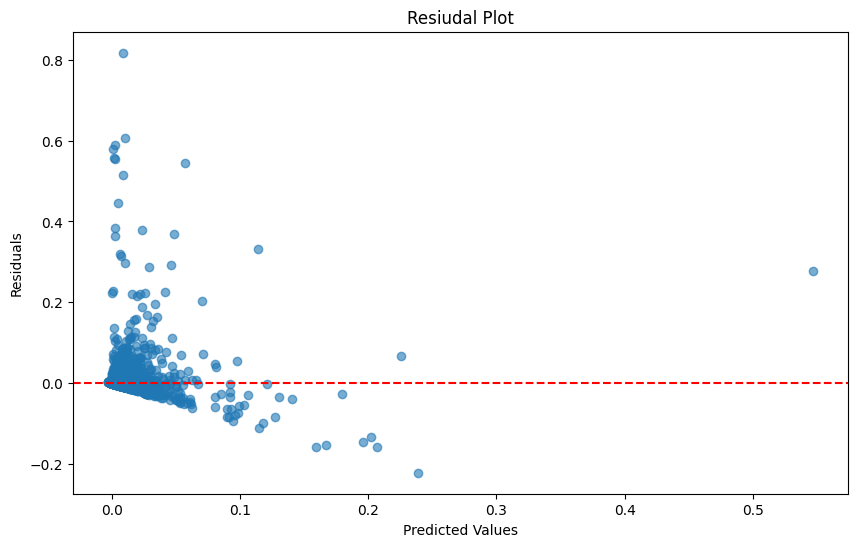

In [21]:
# https://how2matplotlib.com/how-to-create-a-residual-plot-in-python.html
residuals = y_test - y_lr_pred

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_lr_pred, residuals, alpha=0.6)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Resiudal Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()